05-1
결정 트리

In [1]:
import pandas as pd

In [3]:
#  와인 데이터 준비
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [4]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [6]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [7]:
#  넘파이 배열로 바꾸기
data=wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

In [9]:
# 훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size =0.2, random_state=42)

In [10]:
# 훈련세트와 테스트 세트 크기 확인하기
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [12]:
# 훈련세트 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [13]:
# 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled,test_target))

0.7808350971714451
0.7776923076923077


In [14]:
# 계수와 절편 출력
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


결정트리

In [15]:
# DecisionTreeClassifier를 사용하여 모델 훈련 후 정확도 평가
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state= 42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


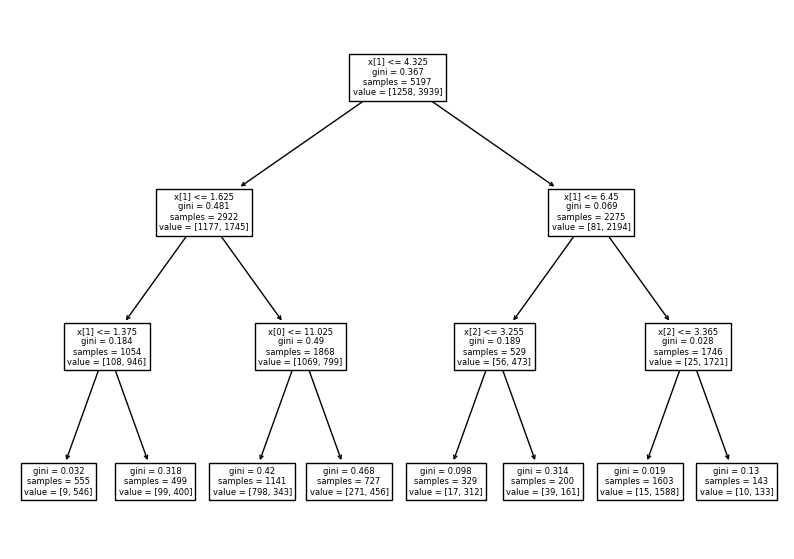

In [24]:
# plot_tree()함수 사용하여 트리 그림 출력
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

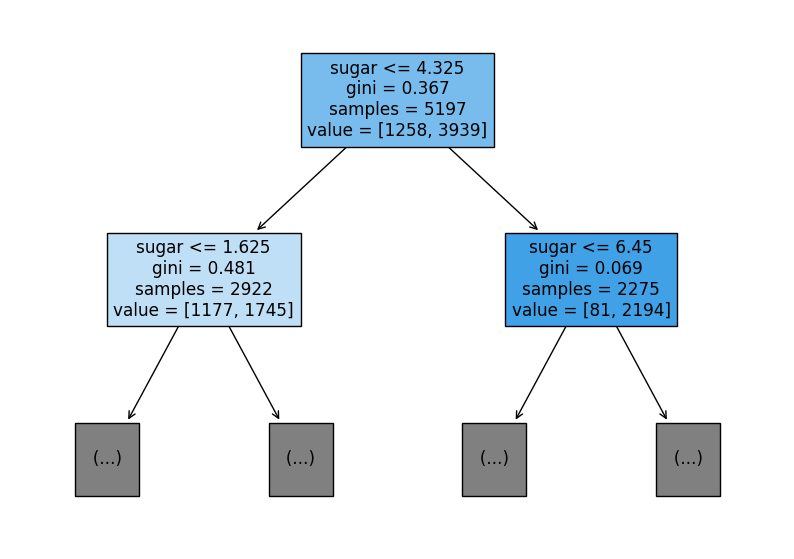

In [25]:
#  트리의 깊이 제한하여 출력
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol','sugar','ph'])
plt.show()

가지치기
-> 결정 트리에서 가지치기를 하는 가장 간단한 방법은 트리의 최대 깊이를 지정하는 것.

In [26]:
# 매개변수를 3으로 지정하여 모델만들기
dt = DecisionTreeClassifier(max_depth =3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


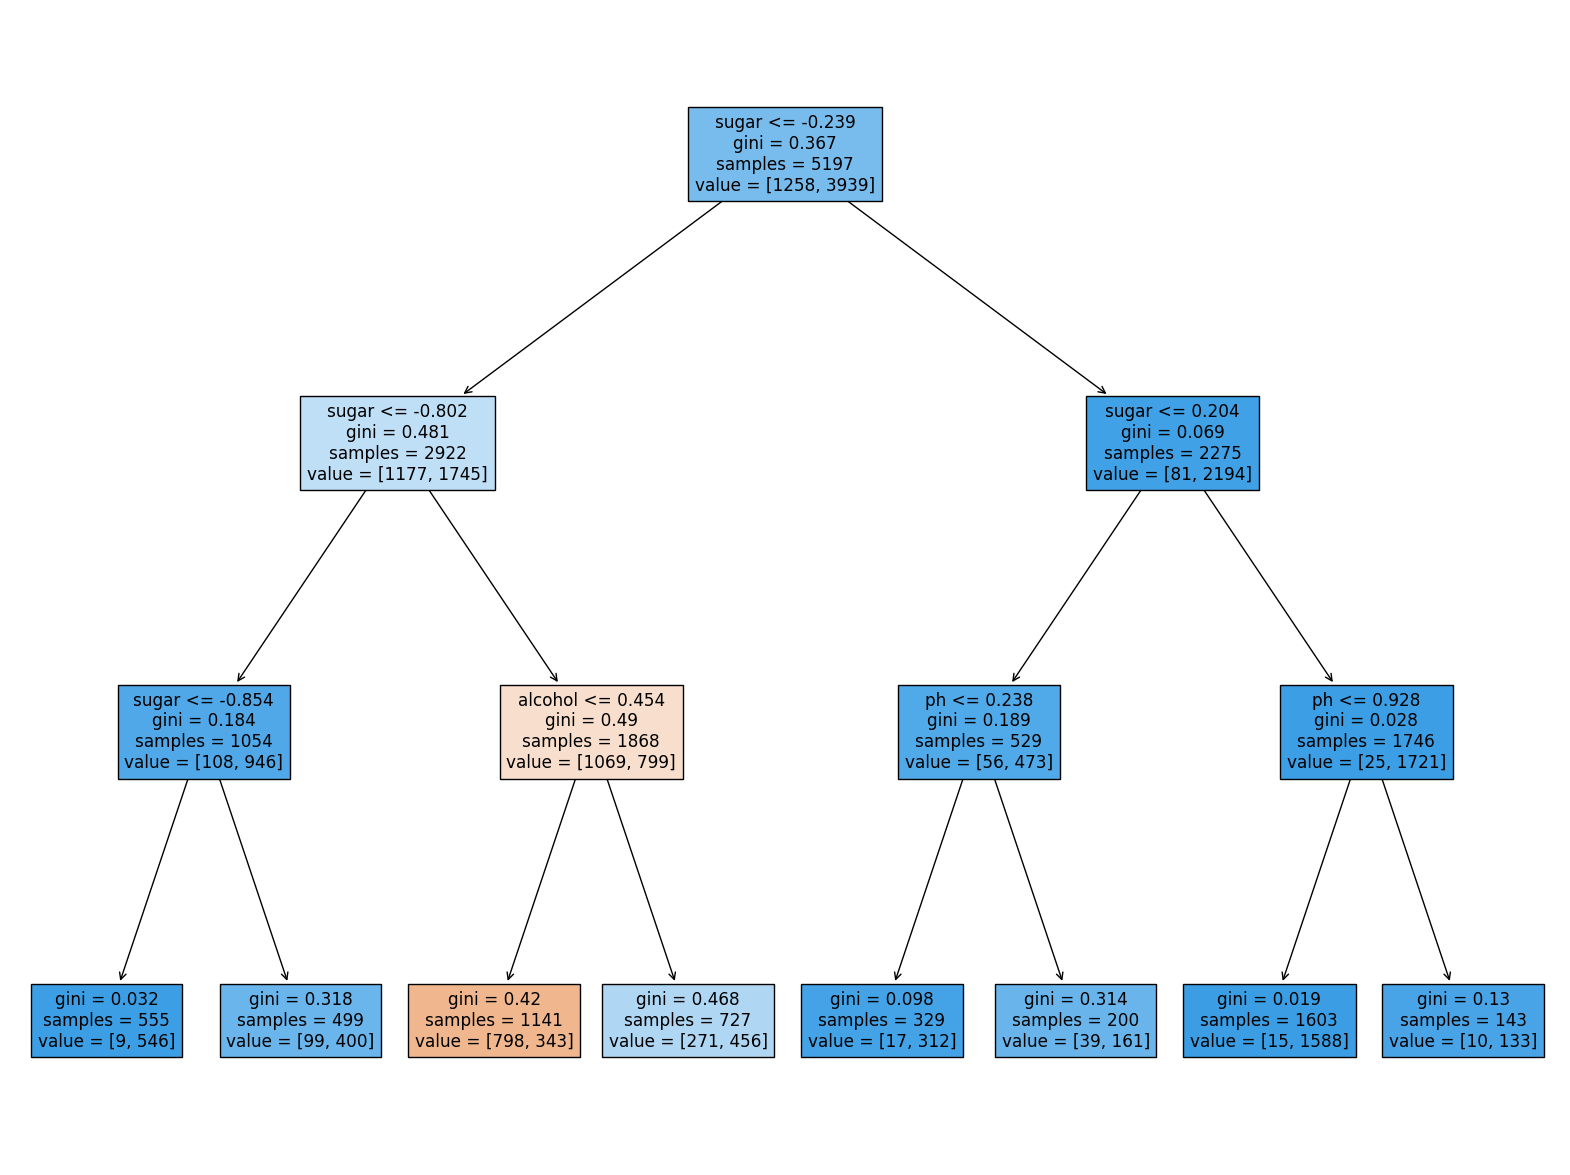

In [27]:
# plot_tree 함수로 그리기
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names =['alcohol','sugar','ph'])
plt.show()

In [28]:
# 전처리 하기전의 훈련세트 와 테스트 세트로 결정트리 모델 훈련
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


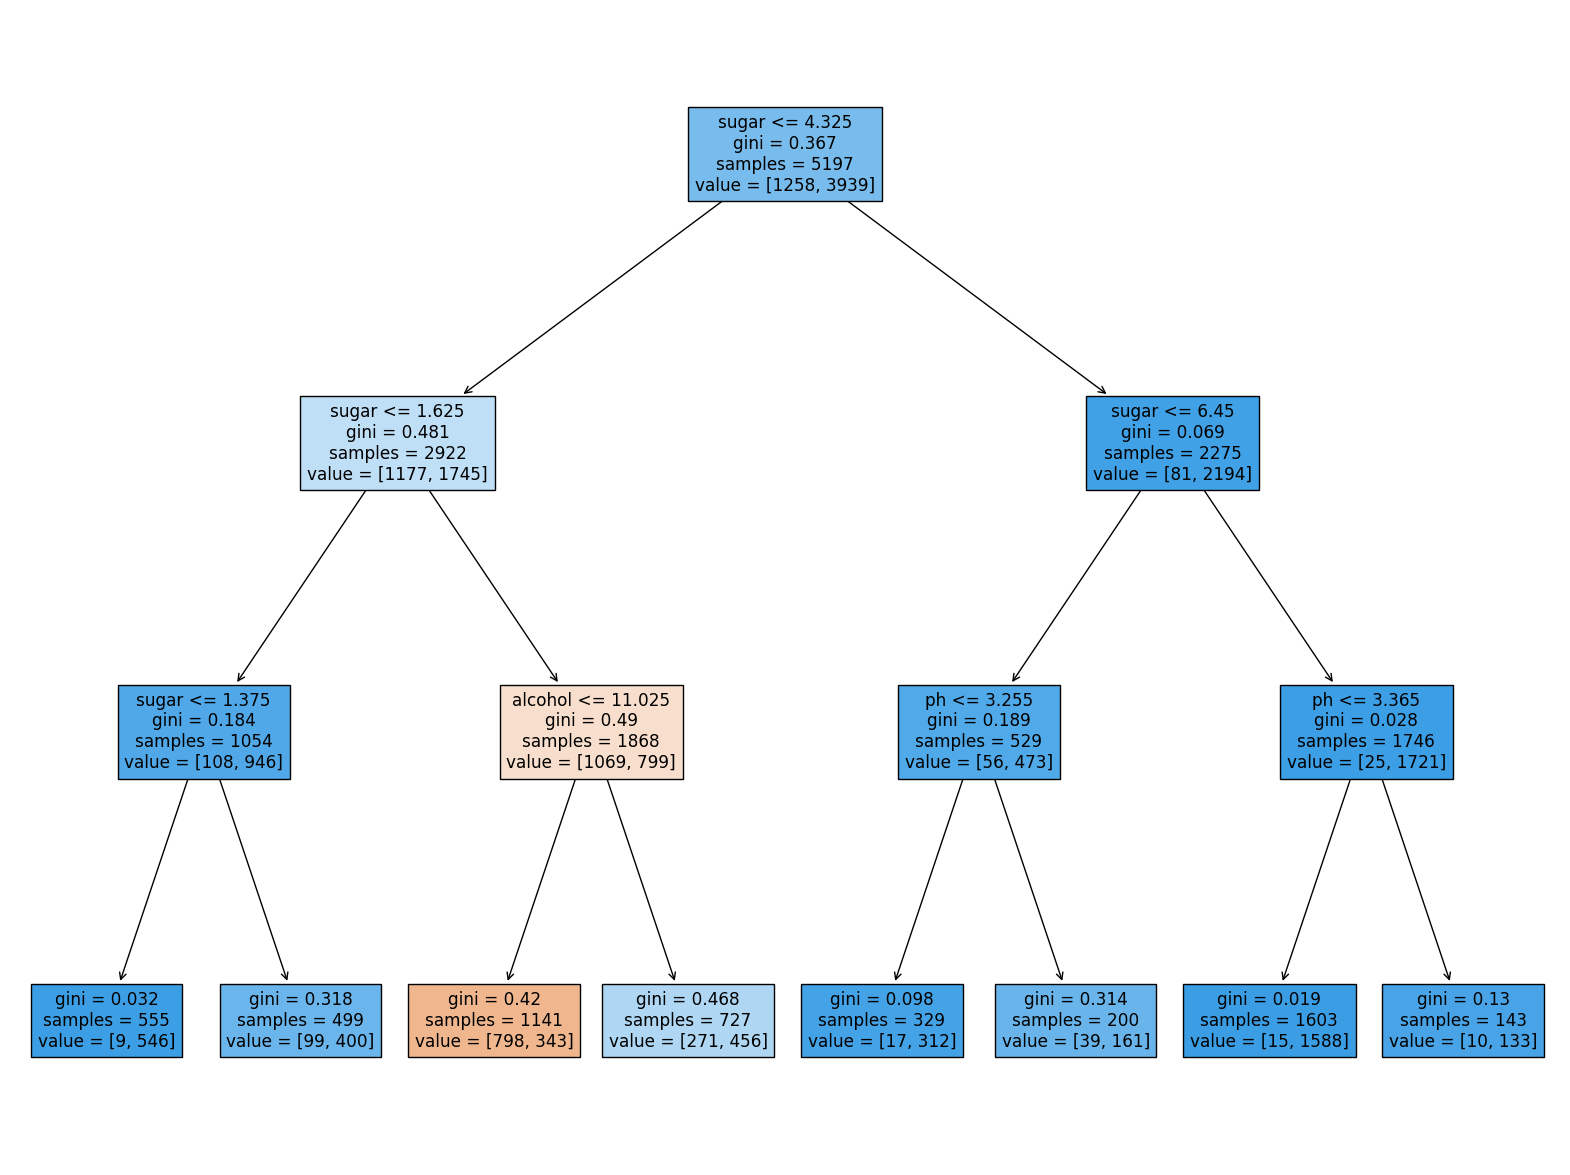

In [30]:
# 트리그리기
plt.figure(figsize=(20,15))
plot_tree(dt,filled=True, feature_names=['alcohol','sugar','ph'])
plt.show()

In [31]:
# 특성중요도 출력_특성 중요도는 각 노드의 정보이득과 전체 샘플에 대한 비율을 곱한 후 특성별로 더하여 계산.
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


확인문제 3.
사이킷런의 결정 트리 클래스가 제공하는 매개변수 중 min_impurity_decrease를 사용해 가지치기를 해 보겠습니다.
어떤 노드의 정보이득 x (노드의 샘플 수) / (전체 샘플수 ) 값이
이 매개변수보다 작으면 더이상 분할하지 않습니다.
이 매개변수의 값을 0.0005로 지정하고 결정 트리를 만들어 보세요.

0.8874350586877044
0.8615384615384616


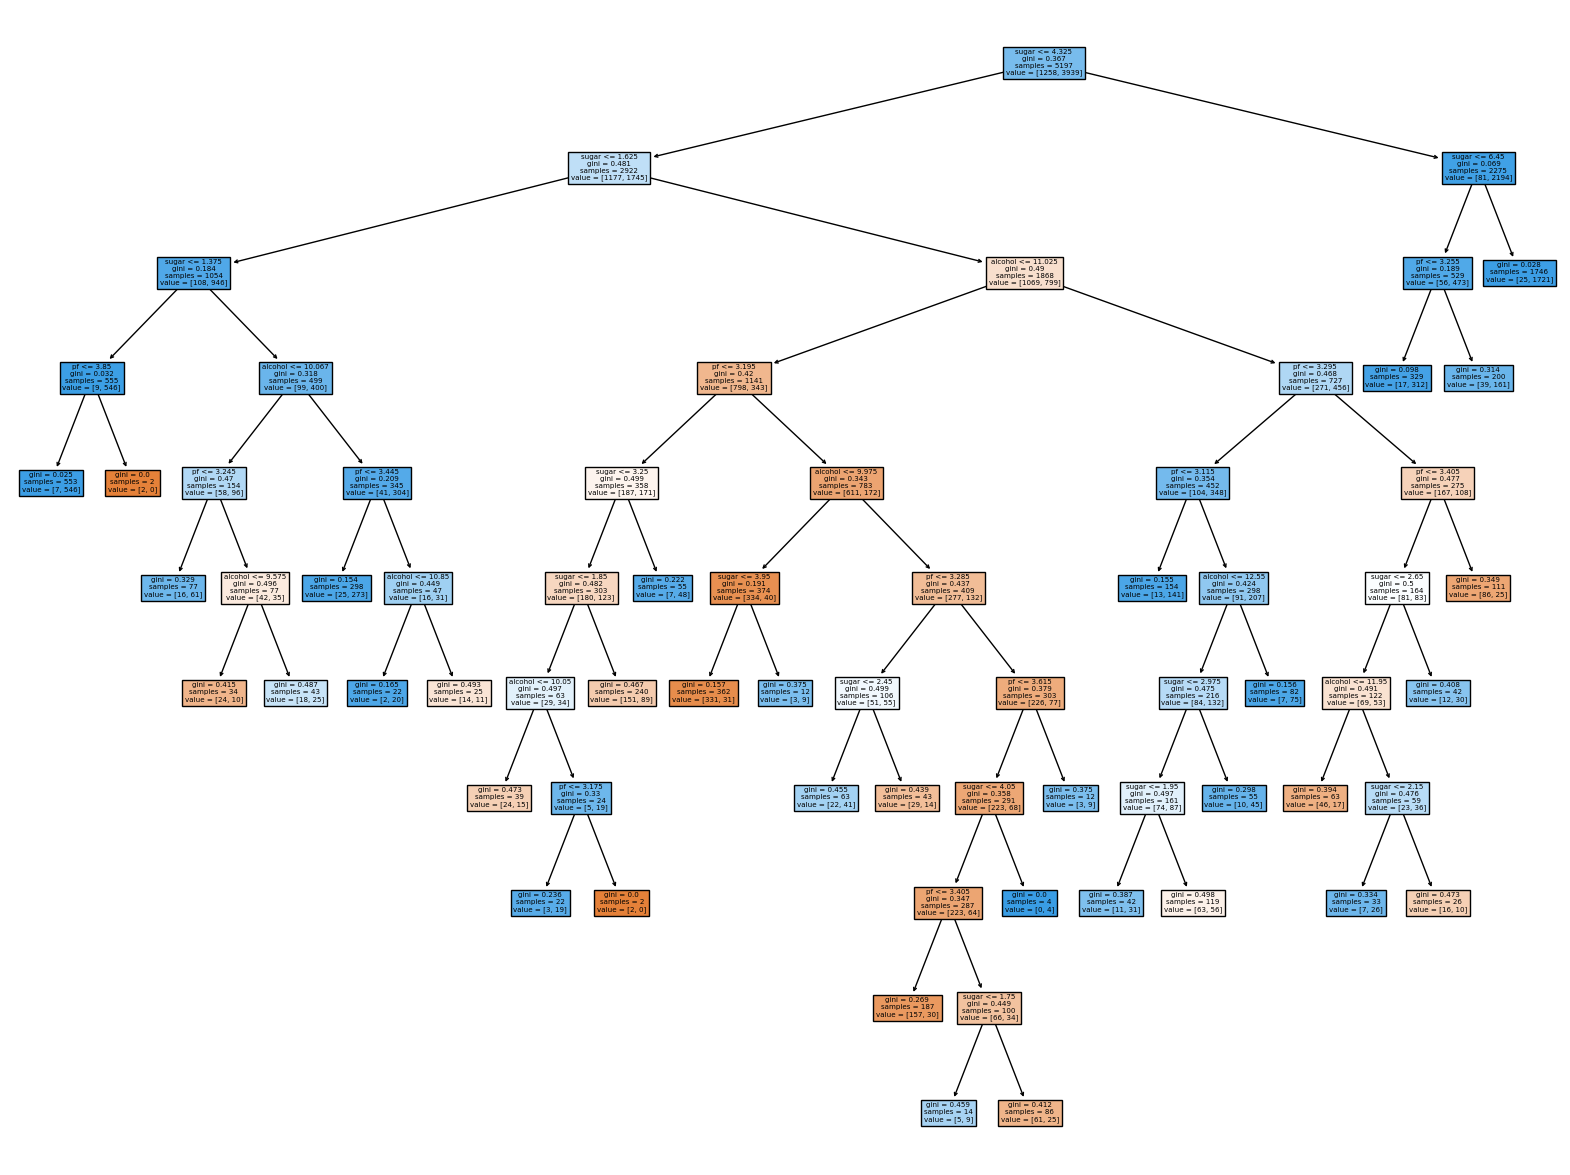

In [33]:
dt=(DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42))
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pf'])
plt.show()
